In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def mc(f, min, max, N, samp_dist):

    # determine number of variables
    if not isinstance(min, (int, float)):
        nvar = len(min)
    else:
        min = [min]
        max = [max]
        nvar = 1    

    # sampling
    if isinstance(samp_dist, (list, tuple)):
        rvs = np.empty((nvar, N))
        for i, dist in enumerate(samp_dist):
            rvs[i] = dist.rvs(size=N)
        
        def pdf(x):
            result = 1
            for i, dist in enumerate(samp_dist):
                result *= dist.pdf(x[i])
            return result

    else:
        rvs = samp_dist.rvs(size=(nvar, N))
        pdf = samp_dist.pdf

    # indicator
    mask = np.empty_like(rvs)
    for i in range(nvar):        
        mask[i] = (min[i] <= rvs[i]) & (rvs[i] <= max[i])    
    mask = np.logical_and.reduce(mask, 0)
    rvs = rvs[:, mask]
    
    # result calcuation    
    y = f(rvs) / pdf(rvs)         
    return np.mean(y)

In [3]:
def compute_mean_and_var(est, N = 100):
    results = []
    for i in range(N):
        results.append(est())
    return np.mean(results), np.var(results)

In [4]:
f2 = lambda x: np.exp(x)
mc(f2, 0, 1, 20, stats.uniform)

1.7489441160856796

In [5]:
mean2, var2 = compute_mean_and_var(lambda: mc(f2, 0, 1, 20, stats.uniform))

print(f"Mean: {mean2}")
print(f"Var: {var2}")

Mean: 1.7149891311432395
Var: 0.01241700753091071


In [6]:
f3 = lambda x: -2*x[0]**2 + 3*x[1]
mins = (-1, 1)
maxs = (2, 3)
sample_dists = (stats.uniform(-1, 3), stats.uniform(1, 2))

Ns = [10, 50, 100, 500, 1000]
means = []
vars = []
for n in Ns:
    mean, var = compute_mean_and_var(lambda: mc(f3, mins, maxs, n, sample_dists))    
    means.append(mean)
    vars.append(var)

(23.5, 26.0)

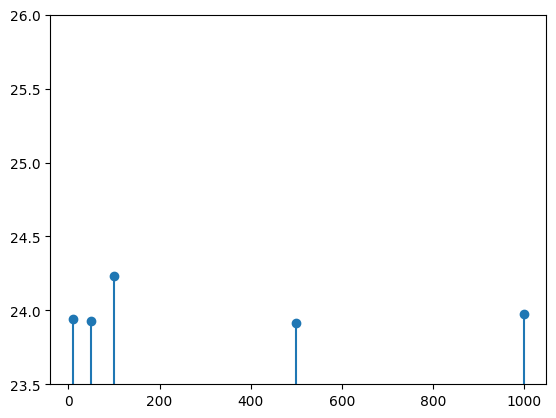

In [7]:
plt.stem(Ns, means)
plt.ylim(23.5, 26)

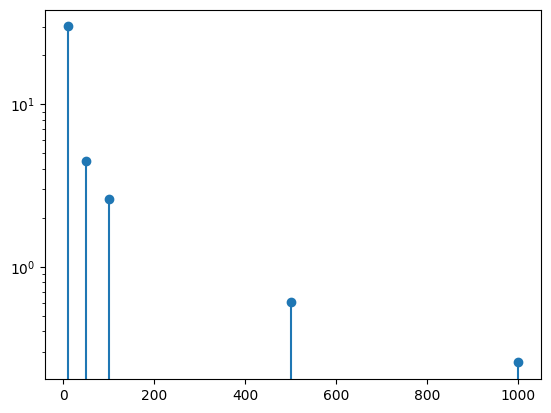

In [8]:
plt.stem(Ns, vars)
plt.yscale('log')

In [9]:
f4 = lambda x: x * np.exp(-2*np.abs(x - 5))
mean4_uni, var4_uni = compute_mean_and_var(lambda :mc(f4, 0, 10, 200, stats.uniform(0, 10)))

print(f"Mean uniform: {mean4_uni}")
print(f"Var uniform: {var4_uni}")

Mean uniform: 5.064551827423592
Var uniform: 0.5334704836890747


In [10]:
mean4_norm, var4_norm = compute_mean_and_var(lambda :mc(f4, 0, 10, 200, stats.norm(5, 1)))

print(f"Mean norm: {mean4_norm}")
print(f"Var norm: {var4_norm}")

Mean norm: 4.995132356989368
Var norm: 0.053957518053036176
